In [1]:
%load_ext blackcellmagic
%pylab inline

from patsy import dmatrices
import pandas as pd
import seaborn as sns
import proplot as plot
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


/home/cmb-06/as/skchoudh/software_frozen/anaconda37/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]


# Code 1.1

In [2]:
crabs_df = pd.read_csv("../data/Crabs.tsv", sep="\t")
crabs_df.head()

,crab,y,weight,width,color,spine
1,1,8,3.05,28.3,2,3
2,2,0,1.55,22.5,3,3
3,3,9,2.30,26.0,1,1
4,4,0,2.10,24.8,3,3
5,5,4,2.60,26.0,3,3


This data comes from a study of female horseshoe crabs (citation unknown). During spawning session, the females migrate to the shore to brred. The males then attach themselves to females' posterior spine while the females
burrows into the sand and lays cluster of eggs. The fertilization of eggs happens externally in the sand beneath the pair. During this spanwing, multulpe males may cluster the pair and may also fertilize the eggs. These males are called satellites.

**crab**: observation index

**y**: Number of satellites attached

**weight**: weight of the female crab

**color**: color of the female 

**spine**:condition of female's spine


In [3]:
print((crabs_df['y'].mean(), crabs_df['y'].var()))

(2.9190751445086707, 9.912017744320465)


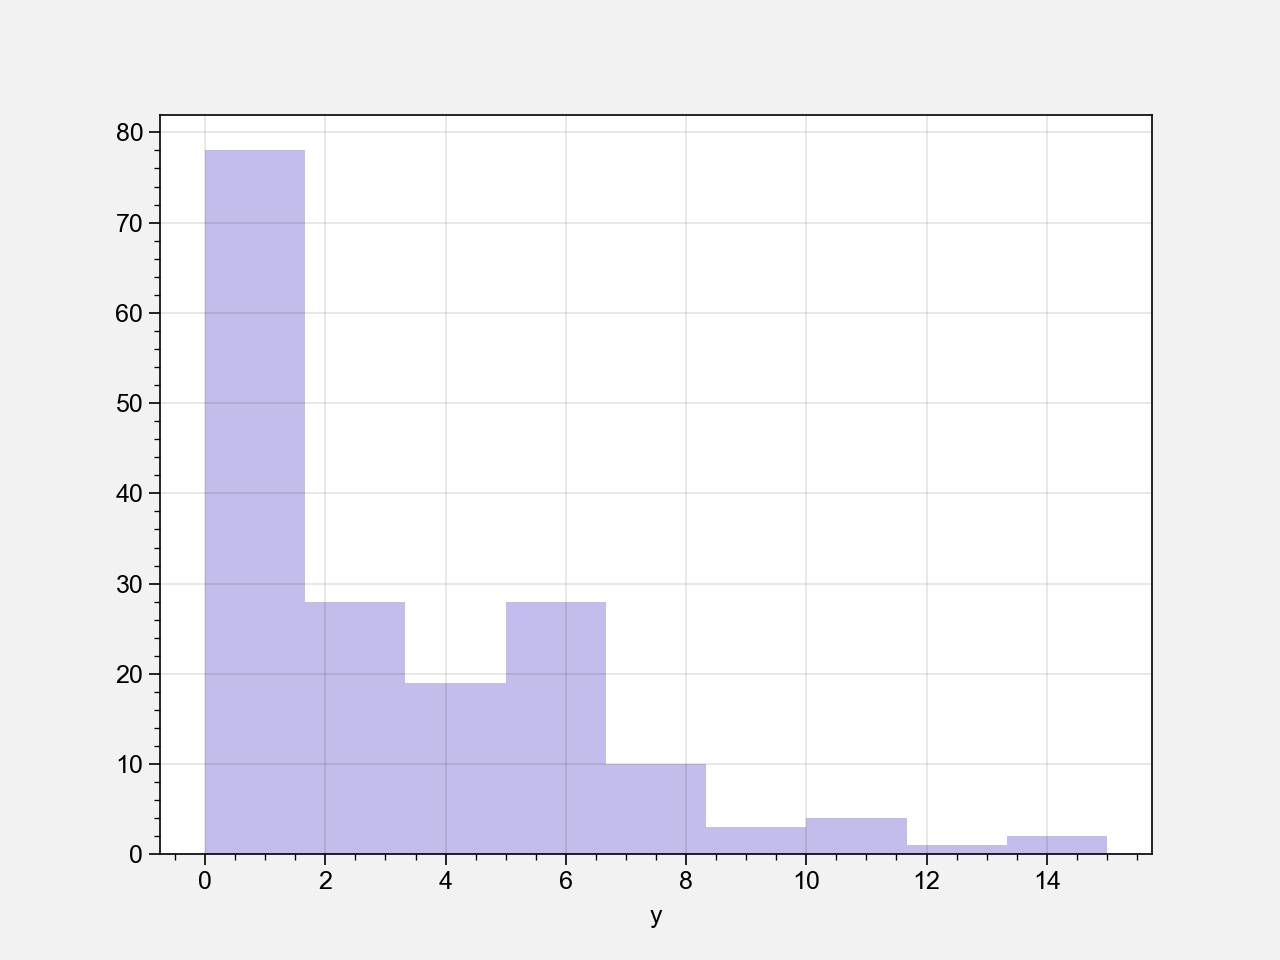

In [4]:
sns.distplot(crabs_df["y"], kde=False, color="slateblue")

In [5]:
pd.crosstab(index=crabs_df["y"], columns="count")

col_0,count
y,
0,62
1,16
2,9
3,19
4,19
5,15
6,13
7,4
8,6


In [6]:
formula = """y ~ 1"""
response, predictors = dmatrices(formula, crabs_df, return_type="dataframe")
fit_pois = sm.GLM(
    response, predictors, family=sm.families.Poisson(link=sm.families.links.identity())
).fit()
print(fit_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      172
Model Family:                 Poisson   Df Model:                            0
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -494.04
Date:                Sat, 20 Jun 2020   Deviance:                       632.79
Time:                        00:06:21   Pearson chi2:                     584.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9191      0.130     22.472      0.0

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:278: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


Fitting a Poisson distribution with a GLM containing only an iontercept and using identity link function gives the estimate of intercept which is essentially the mean of `y`. But poisson has the same mean as its variance. The sample variance of 9.92 suggests that a poisson fit is not appropriate here.

# Linear Model Using Weight to Predict Satellite Counts

In [7]:
print((crabs_df['weight'].mean(), crabs_df['weight'].var()))

(2.437190751445087, 0.33295809712326924)


In [8]:
print(crabs_df['weight'].quantile(q=[0, 0.25, 0.5, 0.75, 1]))

0.00    1.20
0.25    2.00
0.50    2.35
0.75    2.85
1.00    5.20
Name: weight, dtype: float64


Text(0, 0.5, 'y')

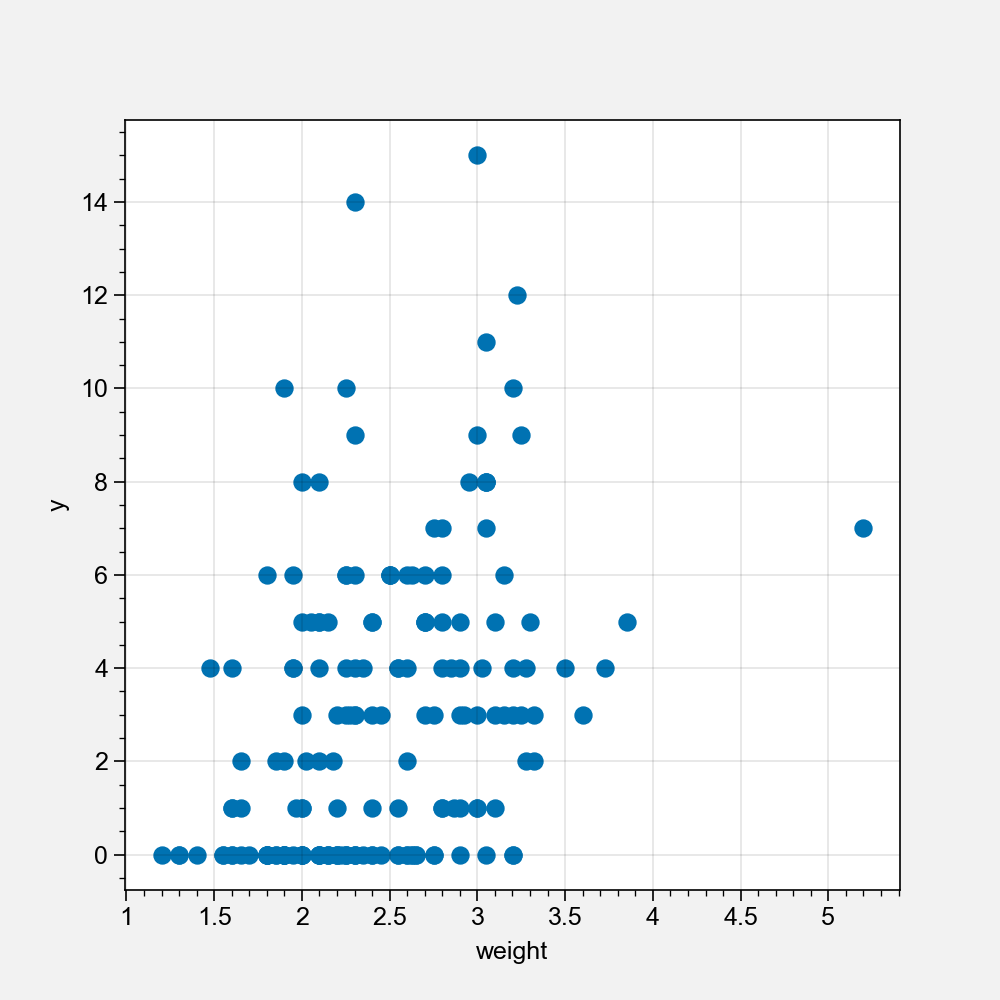

In [9]:
fig, ax = plt.subplots(figsize= (5,5))
ax.scatter(crabs_df['weight'], crabs_df['y'])
ax.set_xlabel('weight')
ax.set_ylabel('y')

The plot shows that there is no clear trend in relation between y (number of satellites) and weight.

## Fit a LM vs GLM (Gaussian)

In [10]:
formula = """y ~ weight"""
fit_weight = smf.ols(formula=formula, data=crabs_df).fit()
print(fit_weight.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     27.00
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           5.75e-07
Time:                        00:06:21   Log-Likelihood:                -430.70
No. Observations:                 173   AIC:                             865.4
Df Residuals:                     171   BIC:                             871.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9911      0.971     -2.050      0.0

In [11]:
response, predictors = dmatrices(formula, crabs_df, return_type="dataframe")
fit_weight2 = sm.GLM(response, predictors, family=sm.families.Gaussian()).fit()
print(fit_weight2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          8.6106
Method:                          IRLS   Log-Likelihood:                -430.70
Date:                Sat, 20 Jun 2020   Deviance:                       1472.4
Time:                        00:06:22   Pearson chi2:                 1.47e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9911      0.971     -2.050      0.0

Thus OLS and a GLM using Gaussian family and identity link are one and the same.

### Plotting the linear fit

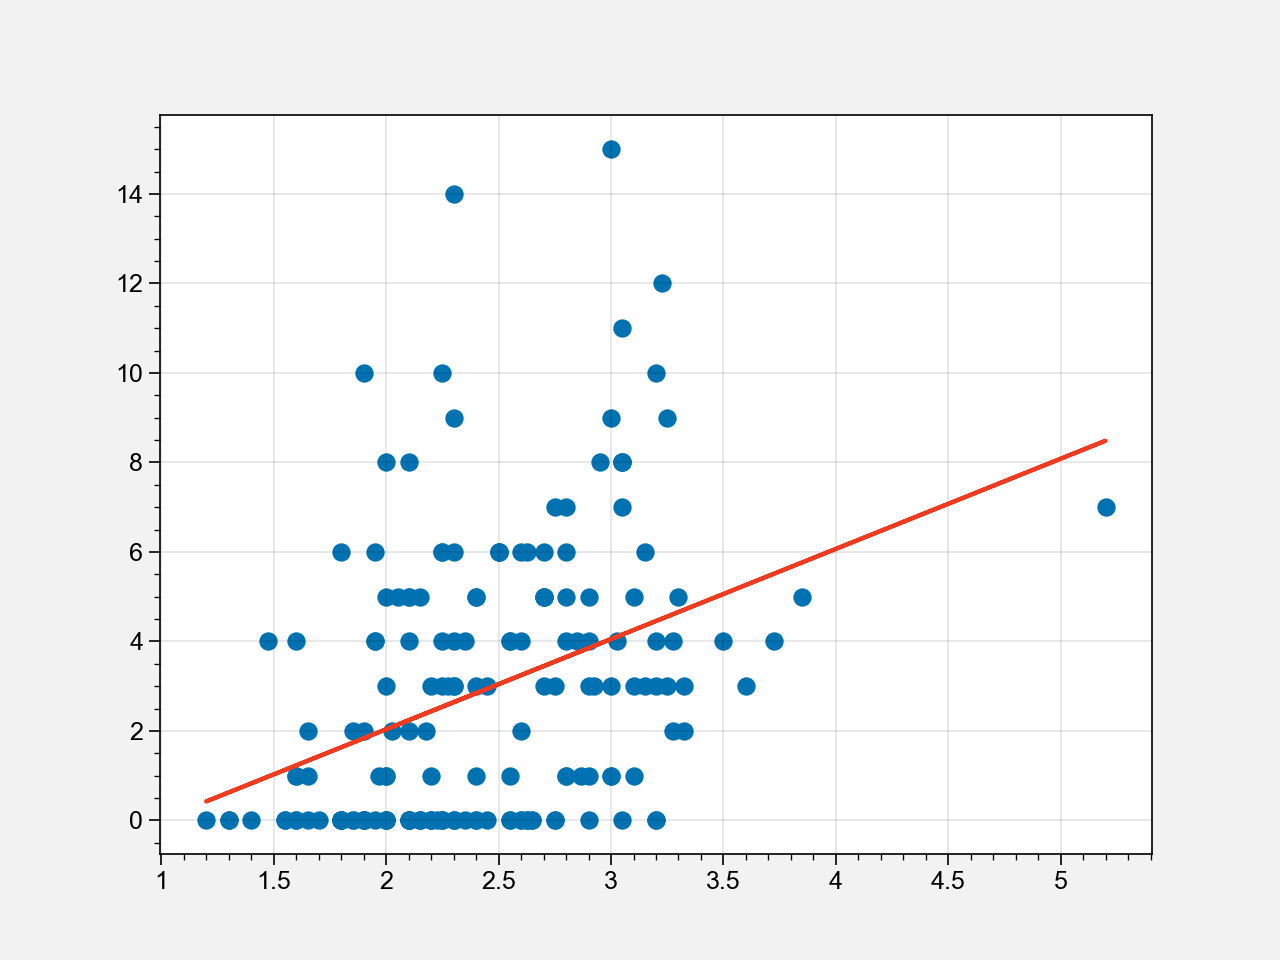

In [12]:
fig, ax = plt.subplots()
ax.scatter(crabs_df['weight'], crabs_df['y'])
line = fit_weight2.params[0] + fit_weight2.params[1]*crabs_df['weight']

ax.plot(crabs_df['weight'], line, color='#f03b20')

##  Comparing Mean Numbers of Satellites by Crab Color

In [13]:
crabs_df['color'].value_counts()

2    95
3    44
4    22
1    12
Name: color, dtype: int64

In [14]:
crabs_df.groupby('color').agg(['mean', 'var'])[['y']]

y           
           mean        var
color                     
1      4.083333   9.719697
2      3.294737  10.273908
3      2.227273   6.737844
4      2.045455  13.093074

Majority of the crabs are of medoum color and the mean response also decreases as the color gets darker.

If we fit a linear model between $y$ and $color$ using `sm.ols`, color is treated as a quantitative variable:

In [15]:
mod = smf.ols(formula="y ~ color", data=crabs_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     6.459
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0119
Time:                        00:06:22   Log-Likelihood:                -440.18
No. Observations:                 173   AIC:                             884.4
Df Residuals:                     171   BIC:                             890.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7461      0.757      6.274      0.0

**Let's treat color as a qualitative variable:**

In [16]:
mod = smf.ols(formula="y ~ C(color)", data=crabs_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.323
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0769
Time:                        00:06:22   Log-Likelihood:                -439.89
No. Observations:                 173   AIC:                             887.8
Df Residuals:                     169   BIC:                             900.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0833      0.899      4.544

This is equivalent to doing a GLM fit with a gaussian family and identity link:

In [17]:
formula = """y ~ C(color)"""
response, predictors = dmatrices(formula, crabs_df, return_type="dataframe")
fit_color = sm.GLM(response, predictors, family=sm.families.Gaussian()).fit()
print(fit_color.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      169
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          9.6884
Method:                          IRLS   Log-Likelihood:                -439.89
Date:                Sat, 20 Jun 2020   Deviance:                       1637.3
Time:                        00:06:22   Pearson chi2:                 1.64e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0833      0.899      4.544

If we instead do a poisson fit:

In [18]:
formula = """y ~ C(color)"""
response, predictors = dmatrices(formula, crabs_df, return_type="dataframe")
fit_color2 = sm.GLM(
    response, predictors, family=sm.families.Poisson(link=sm.families.links.identity)
).fit()
print(fit_color2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      169
Model Family:                 Poisson   Df Model:                            3
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.22
Date:                Sat, 20 Jun 2020   Deviance:                       609.14
Time:                        00:06:22   Pearson chi2:                     584.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0833      0.583      7.000

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.
/home/cmb-06/as/skchoudh/software_frozen/anaconda37/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:278: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


And we get the same estimates as when using Gaussian family with identity link! Because the ML estimates for the poisson distirbution is also the sample mean if there is a single predictor. But the standard values are much smaller. Because the errors here are heteroskedastic while the gaussian version assume homoskesdasticity.

# Using both qualitative and quantitative variables

In [19]:
formula = """y ~ weight + C(color)"""
response, predictors = dmatrices(formula, crabs_df, return_type="dataframe")
fit_weight_color = sm.GLM(response, predictors, family=sm.families.Gaussian()).fit()
print(fit_weight_color.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      168
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          8.6370
Method:                          IRLS   Log-Likelihood:                -429.44
Date:                Sat, 20 Jun 2020   Deviance:                       1451.0
Time:                        00:06:22   Pearson chi2:                 1.45e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8232      1.355     -0.608

In [20]:
formula = """y ~ weight + C(color)"""
response, predictors = dmatrices(formula, crabs_df, return_type="dataframe")
fit_weight_color2 = sm.GLM(
    response, predictors, family=sm.families.Poisson(link=sm.families.links.identity())
).fit()
print(fit_weight_color2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      168
Model Family:                 Poisson   Df Model:                            4
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 20 Jun 2020   Deviance:                       534.33
Time:                        00:06:22   Pearson chi2:                     529.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.9930      0.736     -1.349

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:278: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)
/home/cmb-06/as/skchoudh/software_frozen/anaconda37/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:460: RuntimeWarning: invalid value encountered in log
  return var_weights / scale * (endog * np.log(mu) - mu -
